**התקנת ספריה ליצירת אובייקטים ויזואלים (כגון גרפים) בפייתון**

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


**מאפשר לרנדר את הגרפים שיוצרים באמצעות הספירה**

In [2]:
%matplotlib inline

**קיצור לספריה המאפשרת לנו לעבוד עם מאגרי נתונים**

In [3]:
import pandas as pd

**קיצור לשימוש בפונקציות ספציפיות מתוך הספריה**

In [4]:
from matplotlib import pyplot as plt

**השמת מאגר הנתונים לתוך משתנה**

In [5]:
df = pd.read_csv("reservationsN.csv")

In [6]:
df

,cruise,cancel,TTT,Y,M,W,DOM,weekendnights,weeknights,ADLT,...,deposit,agentNr,CMPY,waiting,CT,DailyAVG,ExtraLock,Special,stat,statD
0,Deluxe,no,69.0,2015.0,July,27.0,2.0,2.0,4.0,2.0,...,No Deposit,175.0,NaN,0.0,Transient,65.50,0.0,0.0,Check-Out,7/8/2015
1,Deluxe,yes,45.0,2015.0,July,27.0,2.0,1.0,3.0,3.0,...,No Deposit,241.0,NaN,0.0,Transient,108.80,0.0,1.0,Canceled,5/19/2015
2,Deluxe,yes,40.0,2015.0,July,27.0,2.0,1.0,3.0,3.0,...,No Deposit,241.0,NaN,0.0,Transient,108.80,0.0,1.0,Canceled,6/19/2015
3,Deluxe,no,15.0,2015.0,July,27.0,2.0,1.0,3.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,0.0,Check-Out,7/6/2015
4,Deluxe,no,36.0,2015.0,July,27.0,2.0,1.0,3.0,3.0,...,No Deposit,241.0,NaN,0.0,Transient,108.80,0.0,1.0,Check-Out,7/6/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119314,Regular,no,63.0,2017.0,August,35.0,31.0,0.0,3.0,3.0,...,No Deposit,9.0,NaN,0.0,Transient-Party,195.33,0.0,2.0,Check-Out,9/3/2017
119315,Regular,no,63.0,2017.0,August,35.0,31.0,0.0,3.0,3.0,...,No Deposit,9.0,NaN,0.0,Transient-Party,195.33,0.0,2.0,Check-Out,9/3/2017
119316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**משנה את פורמט השדה לסוג 'תאריך' בפייתון**

In [7]:
df['statD'] = pd.to_datetime(df['statD'])

**מפלטר את הרשומות כך שיוצגו רק רשומות שהסטטוס הזמה שלהם הוא 'ביטל את ההזמנה' (דבר המסונכרן עם תאריך שינוי הסטטוס לשם קבלת ימות השבוע של הביטולים)**

In [8]:
filtered_df = df[df['stat'].isin(['Canceled'])].copy()

In [9]:
print(filtered_df)

         cruise cancel    TTT       Y      M     W   DOM  weekendnights  \
1        Deluxe    yes   45.0  2015.0   July  27.0   2.0            1.0   
2        Deluxe    yes   40.0  2015.0   July  27.0   2.0            1.0   
5        Deluxe    yes   43.0  2015.0   July  27.0   2.0            1.0   
7        Deluxe    yes   45.0  2015.0   July  27.0   2.0            2.0   
12       Deluxe    yes   47.0  2015.0   July  27.0   2.0            2.0   
...         ...    ...    ...     ...    ...   ...   ...            ...   
107964  Regular    yes   13.0  2017.0    May  22.0  29.0            1.0   
107967  Regular    yes   13.0  2017.0    May  22.0  29.0            1.0   
110247  Regular    yes  132.0  2017.0  April  17.0  25.0            0.0   
111322  Regular    yes    4.0  2017.0   June  23.0   5.0            1.0   
111891  Regular    yes    7.0  2017.0    May  22.0  31.0            0.0   

        weeknights  ADLT  ...     deposit  agentNr   CMPY waiting         CT  \
1              3.0 

**מוסיפים לכל רשומה שדה בשם 'יום בשבוע' אשר לוקח את תאריך שינוי הסטטוס ובהתאם אומר לנו באיזה יום בשבוע הוא**

In [10]:
filtered_df.loc[:, 'Day of Week'] = filtered_df['statD'].dt.day_name()

In [11]:
print(filtered_df)

         cruise cancel    TTT       Y      M     W   DOM  weekendnights  \
1        Deluxe    yes   45.0  2015.0   July  27.0   2.0            1.0   
2        Deluxe    yes   40.0  2015.0   July  27.0   2.0            1.0   
5        Deluxe    yes   43.0  2015.0   July  27.0   2.0            1.0   
7        Deluxe    yes   45.0  2015.0   July  27.0   2.0            2.0   
12       Deluxe    yes   47.0  2015.0   July  27.0   2.0            2.0   
...         ...    ...    ...     ...    ...   ...   ...            ...   
107964  Regular    yes   13.0  2017.0    May  22.0  29.0            1.0   
107967  Regular    yes   13.0  2017.0    May  22.0  29.0            1.0   
110247  Regular    yes  132.0  2017.0  April  17.0  25.0            0.0   
111322  Regular    yes    4.0  2017.0   June  23.0   5.0            1.0   
111891  Regular    yes    7.0  2017.0    May  22.0  31.0            0.0   

        weeknights  ADLT  ...  agentNr   CMPY waiting         CT DailyAVG  \
1              3.0   3

**מקבץ וסופר את כל הרשומות לפי ימות השבוע**

In [12]:
agg_data = filtered_df.groupby('Day of Week')['ADLT'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [13]:
print(agg_data)

Day of Week
Monday       7886
Tuesday      7615
Wednesday    8005
Thursday     6916
Friday       7271
Saturday     2874
Sunday       2445
Name: ADLT, dtype: int64


**יצירת גרף מתוך הטבלה שיצרנו**

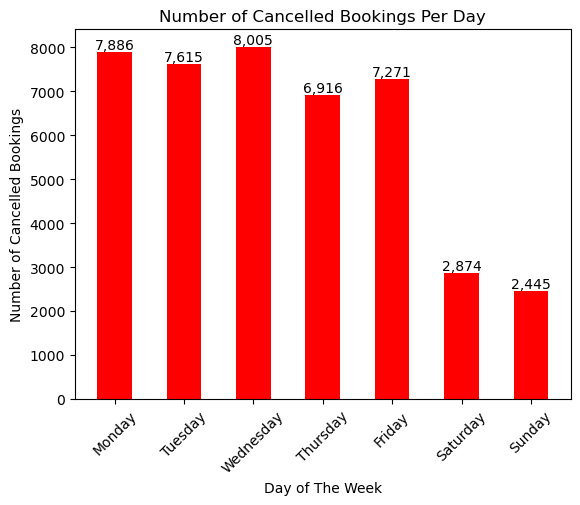

In [14]:
fig, ax = plt.subplots()

days = agg_data.index
counts = agg_data.values

myGraph = ax.bar(days, counts, width=0.5, color="red")

ax.bar_label(myGraph, fmt='{:,.0f}')
ax.set_xlabel('Day of The Week')
ax.set_ylabel('Number of Cancelled Bookings')
ax.set_title('Number of Cancelled Bookings Per Day')
plt.xticks(rotation=45)

plt.show()